<a href="https://colab.research.google.com/github/xkrishnam/notebooks/blob/main/descision_tree_regression_on_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision tree regression with PCA for housing data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("sample_data/california_housing_train.csv") # read training data
htrain_x_df = df.drop("median_house_value" ,axis = 1)
htrain_y = df["median_house_value"].copy()
#prepare training data
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 #('pca-reduce', PCA(n_components=7))
 ])
num_pipe_fit = num_pipeline.fit(htrain_x_df)
htrain_x = num_pipe_fit.transform(htrain_x_df)

print("train X shape {} and training label shape {}".format(htrain_x.shape,htrain_y.shape))

train X shape (17000, 8) and training label shape (17000,)


In [ ]:
# Load and prepare test data
dft = pd.read_csv("sample_data/california_housing_test.csv") # read training data
htest_x_df = dft.drop("median_house_value" ,axis = 1)
htest_y = dft["median_house_value"].copy()
htest_x = num_pipe_fit.transform(htest_x_df)
print("test data shape {} and test label shape {}".format(htest_x.shape,htest_y.shape))

test data shape (3000, 8) and test label shape (3000,)


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(htrain_x , htrain_y)

# errorcalc on test data
housing_predictions = tree_reg.predict(htest_x)
housing_predictions = np.clip(housing_predictions,a_min=14999,a_max=500001)
tree_mse = mean_squared_error(htest_y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

66860.56845982291

In [ ]:
def display_scores (scores):
    print("Scores:", scores)
    print("\n Mean:", scores.mean())
    print("\n Standard deviation:", scores.std(),"\n")
    


from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg  , htest_x  , htest_y , scoring="neg_mean_squared_error"  , cv = 10 )
tree_rmse_scores  = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [84099.29367936 68556.87850763 74559.20448006 79248.24324478
 86719.35832346 80884.04815974 85723.41771496 84402.19018509
 84454.91908342 75773.29237966]

 Mean: 80442.08457581545

 Standard deviation: 5583.383491099921 



In [ ]:
import matplotlib.pyplot as plt

dft['predicted-price'] = housing_predictions 
dft['error'] = dft['predicted-price']-dft['median_house_value']
dft.head()

fig ,(ax1,ax2,ax3) = plt.subplots(1,3,)

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, ax=ax1,
 s=df["population"]/100, label="population", figsize=(25,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

dft.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, ax=ax2,
 s=dft["population"]/100, label="population", 
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

dft.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, ax=ax3,
 s=dft["population"]/100, label="population",
 c="predicted-price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
tree.plot_tree(tree_reg, max_depth=2,fontsize=10)

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000,random_state=2)
rfr.fit(htrain_x , htrain_y)

# errorcalc on test data
housing_predictions = rfr.predict(htest_x)
housing_predictions = np.clip(housing_predictions,a_min=14999,a_max=500001)
tree_mse = mean_squared_error(htest_y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

49130.68556342076

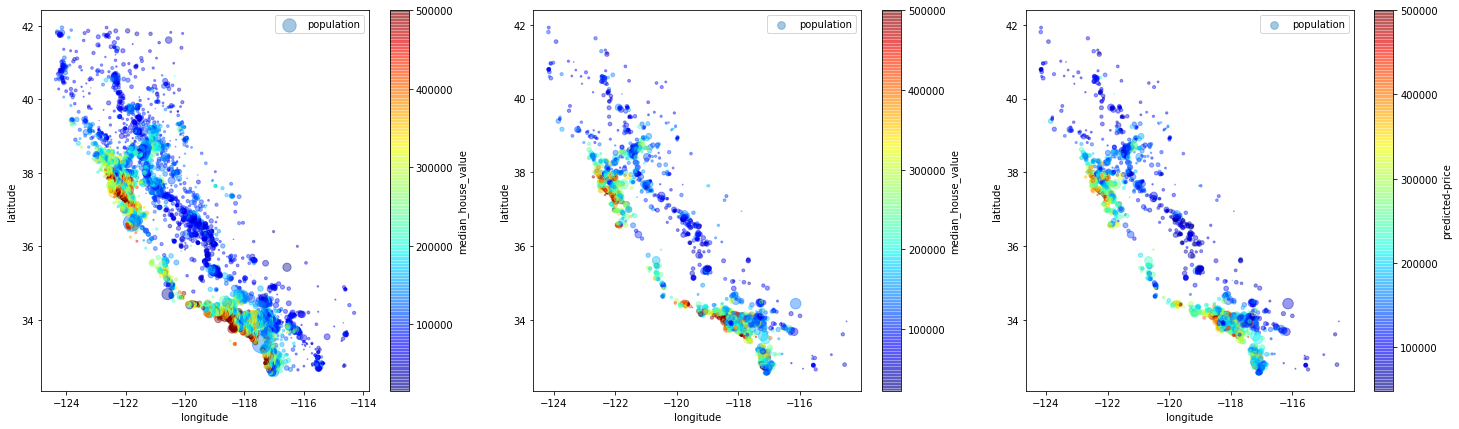

In [ ]:
import matplotlib.pyplot as plt

dft['predicted-price'] = housing_predictions 
dft['error'] = dft['predicted-price']-dft['median_house_value']
dft.head()

fig ,(ax1,ax2,ax3) = plt.subplots(1,3,)

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, ax=ax1,
 s=df["population"]/100, label="population", figsize=(25,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

dft.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, ax=ax2,
 s=dft["population"]/100, label="population", 
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

dft.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, ax=ax3,
 s=dft["population"]/100, label="population",
 c="predicted-price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
# Extreamly randomized trees
from sklearn.ensemble import ExtraTreesRegressor
erfr = ExtraTreesRegressor(n_estimators=1000,random_state=2)
erfr.fit(htrain_x , htrain_y)

# errorcalc on test data
housing_predictions = erfr.predict(htest_x)
housing_predictions = np.clip(housing_predictions,a_min=14999,a_max=500001)
tree_mse = mean_squared_error(htest_y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

52217.0967343759